# Herramienta procesamiento de Datos para analisis de alertas tempranas







Importación de librerias necesarias para ejecución del codigo

In [121]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [123]:
from google.colab import files
uploaded = files.upload()

Saving datos_estudiantes.xlsx to datos_estudiantes.xlsx


In [124]:
filename = 'datos_estudiantes.xlsx'

In [125]:
df = pd.read_excel(filename)

In [126]:
csv_filename = '/content/datos_estudiantes.csv'
df.to_csv(csv_filename, index=False)

In [127]:
print(f"Archivo CSV guardado en: {csv_filename}")

Archivo CSV guardado en: /content/datos_estudiantes.csv


In [128]:
df_csv = pd.read_csv(csv_filename)

In [129]:
print(df_csv.head())

       ID    SEDE  COD. PROGRAMA  \
0  396007  BOGOTA           2113   
1  396007  BOGOTA           2113   
2  396007  BOGOTA           2113   
3  396007  BOGOTA           2113   
4  396007  BOGOTA           2113   

                                            PROGRAMA  SEMESTRE   CÓDIGO  \
0  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   43007C   
1  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63071C   
2  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4  103009C   
3  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63074C   
4  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63073C   

                                     MATERIA   JORNADA  UBICACION SEMESTRAL  \
0                             ÁLGEBRA LINEAL  NOCTURNA                  1.0   
1                                 ALGORITMOS  NOCTURNA                  1.0   
2                             CÁTEDRA PENSAR  NOCTURNA                  1.0   
3             CO


###Incialmente se sube el archivo en extensión .CSV con la data necesaria para el procesamiento de datos
Se muestran las primeras 5 filas de cada columan del Data Frame

Crear y leer Data Frame para iniciar con el procesamiento de los datos

In [130]:

df = pd.read_csv('datos_estudiantes.csv')
print(df.head())

       ID    SEDE  COD. PROGRAMA  \
0  396007  BOGOTA           2113   
1  396007  BOGOTA           2113   
2  396007  BOGOTA           2113   
3  396007  BOGOTA           2113   
4  396007  BOGOTA           2113   

                                            PROGRAMA  SEMESTRE   CÓDIGO  \
0  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   43007C   
1  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63071C   
2  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4  103009C   
3  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63074C   
4  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63073C   

                                     MATERIA   JORNADA  UBICACION SEMESTRAL  \
0                             ÁLGEBRA LINEAL  NOCTURNA                  1.0   
1                                 ALGORITMOS  NOCTURNA                  1.0   
2                             CÁTEDRA PENSAR  NOCTURNA                  1.0   
3             CO

Se muestran todas las columnas integradas en el Data Frame

In [131]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12385 entries, 0 to 12384
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   12385 non-null  int64  
 1   SEDE                 12385 non-null  object 
 2   COD. PROGRAMA        12385 non-null  int64  
 3   PROGRAMA             12385 non-null  object 
 4   SEMESTRE             12385 non-null  int64  
 5   CÓDIGO               12385 non-null  object 
 6   MATERIA              12385 non-null  object 
 7   JORNADA              12385 non-null  object 
 8   UBICACION SEMESTRAL  11700 non-null  float64
 9   PROMEDIO ACUMULADO   12385 non-null  float64
 10  PROMEDIO SEMESTRE    12385 non-null  float64
 11  MOMENTO 1            12385 non-null  object 
 12  MOMENTO 2            12385 non-null  object 
 13  MOMENTO 3            12385 non-null  object 
 14  FINAL                12385 non-null  object 
 15  FALLAS MOMENTO1      12385 non-null 

Elimina las filas con valores nulos en el DataFrame df

In [132]:
df.dropna(inplace=True)

Los valores de las variables de las columnas MOMENTO 1 y MOMENTO 2 los conviere a tipo numérico, y cualquier valor que no se pueda convertir se reemplaza por NaN. Esto es útil para limpiar los datos y preparar el DataFrame para análisis numéricos.



In [149]:
df['MOMENTO 1'] = pd.to_numeric(df['MOMENTO 1'], errors='coerce')
df['MOMENTO 2'] = pd.to_numeric(df['MOMENTO 2'], errors='coerce')

Se imprime que tipos de datos tiene cada columan para verificar que las variables anteriores hayan cambiado de object a float

In [156]:
print("Tipos de datos de las columnas:")
print(df.dtypes)

Tipos de datos de las columnas:
ID                          int64
SEDE                       object
COD. PROGRAMA               int64
PROGRAMA                   object
SEMESTRE                    int64
CÓDIGO                     object
MATERIA                    object
JORNADA                    object
UBICACION SEMESTRAL       float64
PROMEDIO ACUMULADO        float64
PROMEDIO SEMESTRE         float64
MOMENTO 1                 float64
MOMENTO 2                 float64
MOMENTO 3                  object
FINAL                      object
FALLAS MOMENTO1             int64
FALLAS MOMENTO2             int64
FALLAS MOMENTO3             int64
TOTAL FALLAS                int64
ESTADO                     object
EDAD                        int64
GENERO                     object
ESTRATO                     int64
LUGAR DE RESIDENCIA        object
Probabilidad_desercion       bool
dtype: object


Identificar situaciones que requieren atención, como calificaciones bajas en 'MOMENTO 1' o 'MOMENTO 2' inferiores a 3.0.

Identificar número de fallas que se encuentra en un rango de 3 a 5 por cada momento

El resultado es un DataFrame que solo incluye las filas que cumplen con al menos una de las condiciones especificadas.

Se crea un nuevo Data Frame llamado "Alertas Tempranas" con los registros que cumplieron las condiciones especificadas anteriormente.

In [157]:
alertas = df[
    (df['MOMENTO 1'] < 3.0) |
    ((df['FALLAS MOMENTO1'] >= 3) & (df['FALLAS MOMENTO1'] <= 5)) |
    (df['MOMENTO 2'] < 3.0) |
    ((df['FALLAS MOMENTO2'] >= 3) & (df['FALLAS MOMENTO2'] <= 5))
]


In [158]:
print("DataFrame de alertas:")
print(alertas)

DataFrame de alertas:
           ID     SEDE  COD. PROGRAMA  \
0      396007   BOGOTA           2113   
1      396007   BOGOTA           2113   
2      396007   BOGOTA           2113   
3      396007   BOGOTA           2113   
4      396007   BOGOTA           2113   
...       ...      ...            ...   
12377  313509  VIRTUAL            236   
12379  313509  VIRTUAL            236   
12380  379169  VIRTUAL           2115   
12382  379169  VIRTUAL           2115   
12383  379169  VIRTUAL           2115   

                                                PROGRAMA  SEMESTRE   CÓDIGO  \
0      TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   43007C   
1      TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63071C   
2      TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4  103009C   
3      TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63074C   
4      TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63073C   
...        

Se crea un nuevo Data Frame llamado "alertas_unicos" que contendrá solo las filas con valor único por cada estudiate con su ID, eliminando las duplicados. Esto es útil para análisis posteriores donde solo necesitas considerar una instancia de cada ID

In [159]:
alertas_unicos = alertas.drop_duplicates(subset='ID')

# Muestra las alertas únicas

In [160]:
print("Alertas únicas por ID:")
print(alertas_unicos)

Alertas únicas por ID:
           ID     SEDE  COD. PROGRAMA  \
0      396007   BOGOTA           2113   
6      170625   BOGOTA            234   
7      264021   BOGOTA            232   
13     305384   BOGOTA            227   
19     392053   BOGOTA            217   
...       ...      ...            ...   
12359  376537  VIRTUAL           2115   
12365  183720  VIRTUAL            236   
12369  365358  VIRTUAL           2212   
12374  313509  VIRTUAL            236   
12380  379169  VIRTUAL           2115   

                                                PROGRAMA  SEMESTRE   CÓDIGO  \
0      TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   43007C   
6                       INGENIERÍA DE TELECOMUNICACIONES        10   53007C   
7                                 INGENIERÍA DE SISTEMAS        10   63092C   
13     TECNOLOGÍA EN ANÁLISIS Y DESARROLLO DE SISTEMA...         7   63085C   
19     TÉCNICA PROFESIONAL EN INSTALACIÓN DE REDES DE...         4   43007C   
...       

Valida y numera la cantidad de estudiantes que cumplen las regla establecida para generar las alertas tempranas del primer y segundo momento de evaluación

In [161]:
cantidad_estudiantes = alertas_unicos['ID'].nunique()
print(f"\nCantidad de estudiantes únicos que cumplen con las condiciones: {cantidad_estudiantes}")



Cantidad de estudiantes únicos que cumplen con las condiciones: 2216


Comando para exportar el nuevo Data Frame en un archivo "alertas_unicas.csv" que sera utilizado en la siguiente etapa de la evaluación de la herramienta

In [162]:
# Exportar el archivo CSV sin duplicados
datos_estudiantes_csv = 'alertas_unicas.csv'
alertas_unicos.to_csv(datos_estudiantes_csv, index=False)

In [163]:
files.download(datos_estudiantes_csv)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Código Inicial para el Modelo Predictivo

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
df = pd.read_excel('datos_estudiantes.xlsx')

In [167]:
print("Primeras filas del conjunto de datos:")
print(df.head())
print("\nInformación general del conjunto de datos:")
print(df.info())

Primeras filas del conjunto de datos:
       ID    SEDE  COD. PROGRAMA  \
0  396007  BOGOTA           2113   
1  396007  BOGOTA           2113   
2  396007  BOGOTA           2113   
3  396007  BOGOTA           2113   
4  396007  BOGOTA           2113   

                                            PROGRAMA  SEMESTRE   CÓDIGO  \
0  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   43007C   
1  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63071C   
2  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4  103009C   
3  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63074C   
4  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4   63073C   

                                     MATERIA   JORNADA  UBICACION SEMESTRAL  \
0                             ÁLGEBRA LINEAL  NOCTURNA                  1.0   
1                                 ALGORITMOS  NOCTURNA                  1.0   
2                             CÁTEDRA PENSAR  NOCTURNA   

In [168]:
categorical_columns = ['SEDE', 'PROGRAMA', 'JORNADA', 'MATERIA', 'ESTADO', 'GENERO', 'LUGAR DE RESIDENCIA']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [169]:
import pandas as pd
import numpy as np

for col in ['MOMENTO 1', 'MOMENTO 2', 'MOMENTO 3', 'FINAL']:
    # Reemplazar guiones con NaN
    df[col] = df[col].replace('-', np.nan, regex=True)
    # Reemplazar comas por puntos y convertir a float
    df[col] = df[col].str.replace(',', '.', regex=True).astype(float)

In [170]:
import pandas as pd
import numpy as np

for col in ['MOMENTO 1', 'MOMENTO 2', 'MOMENTO 3', 'FINAL']:
    # Reemplazar guiones con NaN
    df[col] = df[col].replace('-', np.nan, regex=True)
    # Convertir la columna a tipo cadena antes de usar .str.replace
    df[col] = df[col].astype(str).str.replace(',', '.', regex=True).astype(float)
    #Reemplazamos la , por . y convertimos la columna a float.

In [171]:
X = df.drop(columns=['ESTADO'])
y = df['ESTADO']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
import pandas as pd
import numpy as np
import re

# Función para extraer el valor numérico
def extract_number(value):
    try:
        # Busca números con o sin decimales al inicio de la cadena
        number = re.search(r"^\d+(\.\d+)?", str(value)).group(0)
        return float(number)
    except (AttributeError, TypeError):
        # Si no encuentra un número, retorna NaN
        return np.nan

# Aplicar la función a las columnas relevantes de tu DataFrame
for col in ['MOMENTO 1', 'MOMENTO 2', 'MOMENTO 3', 'FINAL']:
    df[col] = df[col].apply(extract_number)

# Resto de tu código...

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
for columna in X.columns:
    if X[columna].dtype == 'object': # Busca columnas con tipo de dato 'object' (texto)
        if '43006C' in X[columna].values:
            print(f"La columna '{columna}' contiene el valor '43006C'")
            break

La columna 'CÓDIGO' contiene el valor '43006C'


In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Identificar la columna que contiene '43006C' (o cualquier valor con 'C')
for columna in X.columns:
    if X[columna].dtype == 'object':
        if any(X[columna].astype(str).str.contains('C')):  # Verificar si algún valor contiene 'C'
            print(f"La columna '{columna}' contiene valores con 'C'")
            columna_con_c = columna
            break
else:
    columna_con_c = None  # Si no se encuentra ninguna columna con 'C'

# Verificar si se encontró una columna con 'C' antes de continuar
if columna_con_c is not None:  # <--  Agregar esta condición
    # Eliminar la 'C' de los valores en la columna identificada
    X[columna_con_c] = X[columna_con_c].astype(str).str.replace('C', '')
    print(f"Se ha eliminado la 'C' de la columna '{columna_con_c}'")

    # Convertir la columna a numérica si es necesario
    try:
        X[columna_con_c] = pd.to_numeric(X[columna_con_c])
    except ValueError:
        print(f"La columna '{columna_con_c}' aún contiene valores no numéricos después de eliminar la 'C'. "
              f"Puede que necesites realizar una limpieza adicional.")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

La columna 'CÓDIGO' contiene valores con 'C'
Se ha eliminado la 'C' de la columna 'CÓDIGO'


RandomForestClassifier(random_state=42)

In [179]:
predicciones = modelo_rf.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {precision}")

Precisión del modelo: 0.9987888574888979


Precisión: 0.9987888574888979
Precisión (positiva): 0.9934640522875817
Sensibilidad (Recall): 1.0
Puntuación F1: 0.9967213114754099


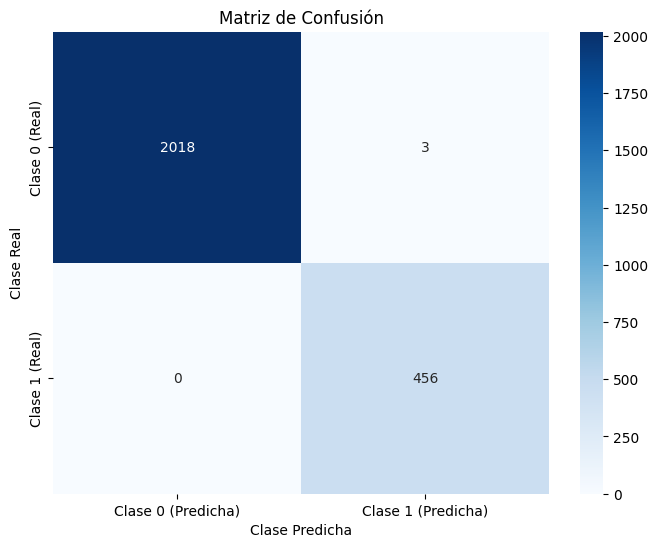

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Código anterior para limpiar los datos y entrenar el modelo) ...

# Hacer predicciones sobre los datos de prueba
predicciones = modelo_rf.predict(X_test)

# Calcular las métricas
precision = accuracy_score(y_test, predicciones)
precision_positiva = precision_score(y_test, predicciones)
sensibilidad = recall_score(y_test, predicciones)
f1 = f1_score(y_test, predicciones)

# Imprimir las métricas
print(f"Precisión: {precision}")
print(f"Precisión (positiva): {precision_positiva}")
print(f"Sensibilidad (Recall): {sensibilidad}")
print(f"Puntuación F1: {f1}")

# Crear la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

# Mostrar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Clase 0 (Predicha)", "Clase 1 (Predicha)"],
            yticklabels=["Clase 0 (Real)", "Clase 1 (Real)"])
plt.title("Matriz de Confusión")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.show()

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2021
           1       0.99      1.00      1.00       456

    accuracy                           1.00      2477
   macro avg       1.00      1.00      1.00      2477
weighted avg       1.00      1.00      1.00      2477



In [183]:
probas = modelo_rf.predict_proba(X_test)[:, 1]

In [184]:
umbral = 0.7
alto_riesgo = probas > umbral

In [185]:
df = pd.DataFrame({
        'proba': probas,
    'alto_riesgo': alto_riesgo})


In [186]:
print(df)

# Visualizar los nombres de las columnas del DataFrame
print("\nNombres de las columnas:")
print(df.columns)

      proba  alto_riesgo
0      0.98         True
1      0.00        False
2      1.00         True
3      0.00        False
4      0.00        False
...     ...          ...
2472   0.00        False
2473   0.00        False
2474   0.00        False
2475   0.00        False
2476   0.00        False

[2477 rows x 2 columns]

Nombres de las columnas:
Index(['proba', 'alto_riesgo'], dtype='object')


In [189]:
filename = 'alertas_unicas.csv'

In [190]:
df = pd.read_csv('alertas_unicas.csv')
print(df.head())

       ID    SEDE  COD. PROGRAMA  \
0  396007  BOGOTA           2113   
1  170625  BOGOTA            234   
2  264021  BOGOTA            232   
3  305384  BOGOTA            227   
4  392053  BOGOTA            217   

                                            PROGRAMA  SEMESTRE  CÓDIGO  \
0  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4  43007C   
1                   INGENIERÍA DE TELECOMUNICACIONES        10  53007C   
2                             INGENIERÍA DE SISTEMAS        10  63092C   
3  TECNOLOGÍA EN ANÁLISIS Y DESARROLLO DE SISTEMA...         7  63085C   
4  TÉCNICA PROFESIONAL EN INSTALACIÓN DE REDES DE...         4  43007C   

                    MATERIA   JORNADA  UBICACION SEMESTRAL  \
0            ÁLGEBRA LINEAL  NOCTURNA                  1.0   
1     PROYECTO FIN DE GRADO  NOCTURNA                 10.0   
2  ARQUITECTURA EMPRESARIAL  NOCTURNA                 10.0   
3     ARQUITECTURA DE DATOS  NOCTURNA                  7.0   
4            ÁLGEBRA LINEAL 

In [191]:
df['probabilidad_desercion'] = 1

In [192]:
probabilidad_desercion= df.copy()

In [194]:
print(probabilidad_desercion.head())

       ID    SEDE  COD. PROGRAMA  \
0  396007  BOGOTA           2113   
1  170625  BOGOTA            234   
2  264021  BOGOTA            232   
3  305384  BOGOTA            227   
4  392053  BOGOTA            217   

                                            PROGRAMA  SEMESTRE  CÓDIGO  \
0  TÉCNICA PROFESIONAL EN OPERACIÓN Y MANTENIMIEN...         4  43007C   
1                   INGENIERÍA DE TELECOMUNICACIONES        10  53007C   
2                             INGENIERÍA DE SISTEMAS        10  63092C   
3  TECNOLOGÍA EN ANÁLISIS Y DESARROLLO DE SISTEMA...         7  63085C   
4  TÉCNICA PROFESIONAL EN INSTALACIÓN DE REDES DE...         4  43007C   

                    MATERIA   JORNADA  UBICACION SEMESTRAL  \
0            ÁLGEBRA LINEAL  NOCTURNA                  1.0   
1     PROYECTO FIN DE GRADO  NOCTURNA                 10.0   
2  ARQUITECTURA EMPRESARIAL  NOCTURNA                 10.0   
3     ARQUITECTURA DE DATOS  NOCTURNA                  7.0   
4            ÁLGEBRA LINEAL 

In [197]:
# Suponiendo que 'alto_riesgo' se define por una condición en la columna 'probabilidad_desercion'
alto_riesgo = df['probabilidad_desercion'] > 0.8  # Ajusta la condición según tu lógica

# Ahora 'alto_riesgo' tendrá la misma longitud que 'df'
estudiantes_en_riesgo = df.loc[alto_riesgo, ['ID', 'probabilidad_desercion']]
print(estudiantes_en_riesgo)

          ID  probabilidad_desercion
0     396007                       1
1     170625                       1
2     264021                       1
3     305384                       1
4     392053                       1
...      ...                     ...
2211  376537                       1
2212  183720                       1
2213  365358                       1
2214  313509                       1
2215  379169                       1

[2216 rows x 2 columns]


In [199]:
estudiantes_en_riesgo = df.loc[alto_riesgo, ['ID', 'probabilidad_desercion']]
print(estudiantes_en_riesgo)

          ID  probabilidad_desercion
0     396007                       1
1     170625                       1
2     264021                       1
3     305384                       1
4     392053                       1
...      ...                     ...
2211  376537                       1
2212  183720                       1
2213  365358                       1
2214  313509                       1
2215  379169                       1

[2216 rows x 2 columns]
